In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# env
class cliffWalking:
    def __init__(self, height=4, width=12):
        self.height = height
        self.width = width

        # start and goal
        self.START = [3, 0]
        self.GOAL = [3, 11]

        # actions
        self.ACTION_UP = 0
        self.ACTION_DOWN = 1
        self.ACTION_LEFT = 2
        self.ACTION_RIGHT = 3
        self.ACTIONS = [
            self.ACTION_UP,
            self.ACTION_DOWN,
            self.ACTION_LEFT,
            self.ACTION_RIGHT
        ]

    def step(self, state, action):
        i, j = state
        if action == self.ACTION_UP:
            next_state = [max(i - 1, 0), j]
        elif action == self.ACTION_LEFT:
            next_state = [i, max(j - 1, 0)]
        elif action == self.ACTION_RIGHT:
            next_state = [i, min(j + 1, self.width - 1)]
        elif action == self.ACTION_DOWN:
            next_state = [min(i + 1, self.height - 1), j]
        reward = -1

        # cliff
        if (action == self.ACTION_DOWN and i == 2 and 1 <= j <= 10) or \
           (action == self.ACTION_RIGHT and state == self.START):
            reward = -100
            next_state = self.START
        return next_state, reward

class agent:
    def __init__(self, env, epsilon=0.1, alpha=0.5, gamma=1):
        self.env = env
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma

        # initialize q-values
        self.q_value = np.zeros((env.height, env.width, len(env.ACTIONS)))

    def choose_action(self, state):
        # epsilon-greedy exploration
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.env.ACTIONS)

        # greedy tie-breaking across max actions
        values = self.q_value[state[0], state[1], :]
        return np.random.choice(np.where(values == np.max(values))[0])

    def sarsa_episode(self):
        state = self.env.START
        action = self.choose_action(state)
        rewards = 0.0

        while state != self.env.GOAL:
            next_state, reward = self.env.step(state, action)
            next_action = self.choose_action(next_state)
            rewards += reward

            # sarsa update target
            target = self.q_value[next_state[0], next_state[1], next_action]

            # update using what we just saw
            self.q_value[state[0], state[1], action] += self.alpha * (
                reward + self.gamma * target - self.q_value[state[0], state[1], action]
            )

            state = next_state
            action = next_action
        return rewards

    def q_learning_episode(self):
        state = self.env.START
        rewards = 0.0

        while state != self.env.GOAL:
            action = self.choose_action(state)
            next_state, reward = self.env.step(state, action)
            rewards += reward

            # q-learning update with max over actions
            self.q_value[state[0], state[1], action] += self.alpha * (
                reward + self.gamma * np.max(self.q_value[next_state[0], next_state[1], :]) -
                self.q_value[state[0], state[1], action]
            )
            state = next_state

        return rewards

100%|██████████| 200/200 [00:29<00:00,  6.68it/s]


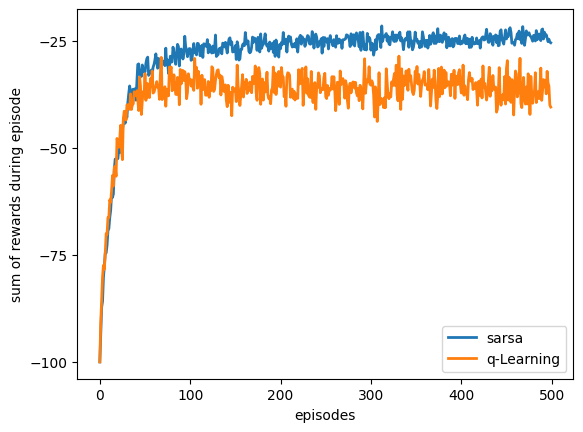

In [13]:
def figure_6_4():
    episodes = 500
    runs = 200

    rewards_sarsa = np.zeros(episodes)
    rewards_q_learning = np.zeros(episodes)

    for _ in tqdm(range(runs)):
        env = cliffWalking()
        agent_sarsa = agent(env)
        agent_q = agent(env)
        for i in range(episodes):
            rewards_sarsa[i] += max(agent_sarsa.sarsa_episode(), -100)
            rewards_q_learning[i] += max(agent_q.q_learning_episode(), -100)

    rewards_sarsa /= runs
    rewards_q_learning /= runs

    plt.plot(rewards_sarsa, label='sarsa', linewidth=2)
    plt.plot(rewards_q_learning, label='q-Learning', linewidth=2)
    plt.xlabel('episodes')
    plt.ylabel('sum of rewards during episode')
    plt.yticks([-100, -75, -50, -25])
    plt.legend()
    plt.show()

figure_6_4()